### EDA and Linear Regression

In [156]:
import pandas as pd
import numpy as np
import re
import math
import seaborn as sns
from matplotlib import pyplot as plt
from collections import defaultdict
#from IPython.core.display import display, HTML
import pickle
import copy
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.model_selection import train_test_split
#display(HTML(my_html))     # make sure Jupyter knows to display it as HTML

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import  StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [ ]:
#director = 'godard'
#director = 'hitchcock'
#director = 'bergman'
#director = 'fassbinder'
#director = 'herzog'
#director = 'allen'
director='scorsese'

In [157]:

pd.options.display.float_format = "{:,.5f}".format

In [158]:
director='hitchcock'
dir_str = director + '/'

films_filename = 'films_to_analyze_' + director
with open(dir_str + films_filename, 'rb') as read_file:
    films_to_analyze = pickle.load(read_file)

In [159]:
films_to_analyze.head(100)

,title,year,release_date,duration,runtime,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,...,Brigitte Auber,Georgette Anys,Sara Berner,Wendell Corey,Thelma Ritter,Raymond Burr,Judith Evelyn,Ross Bagdasarian,Georgine Darcy,Ernest Thesiger
2,Family Plot,"1,976.00000",9 April 1976 (USA),120.00000,120.00000,"4,490,375.00000","13,200,000.00000",NaN,"13,200,000.00000",6.80000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,Frenzy,"1,972.00000",21 June 1972 (USA),116.00000,116.00000,"2,000,000.00000","12,600,000.00000","4,121.00000","12,600,000.00000",7.40000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,Topaz,"1,969.00000",19 December 1969 (USA),143.00000,143.00000,"4,000,000.00000","6,000,000.00000",NaN,"6,000,000.00000",6.30000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5,Torn Curtain,"1,966.00000",27 July 1966 (USA),128.00000,128.00000,"6,000,000.00000","13,000,000.00000",NaN,"13,000,000.00000",6.70000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
6,Marnie,"1,964.00000",17 July 1964 (USA),130.00000,130.00000,"3,000,000.00000","7,008,058.00000","7,095.00000","7,008,058.00000",7.20000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
7,The Birds,"1,963.00000",29 March 1963 (USA),119.00000,119.00000,"2,500,000.00000","11,436,184.00000","32,655.00000","11,436,184.00000",7.70000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
8,The Alfred Hitchcock Hour,"1,962.00000",20 September 1962 (USA),50.00000,50.00000,NaN,NaN,NaN,NaN,8.50000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
10,Psycho,"1,960.00000",8 September 1960 (USA),109.00000,109.00000,"806,947.00000","32,000,000.00000","32,040,242.00000","32,000,000.00000",8.50000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
11,Startime,"1,959.00000",6 October 1959 (USA),60.00000,60.00000,NaN,NaN,NaN,NaN,5.60000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
12,North by Northwest,"1,959.00000",18 December 1959 (USA),136.00000,136.00000,"3,101,000.00000","13,369,740.00000","73,695.00000","13,369,740.00000",8.30000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [160]:
prevalent_actors_filename  = 'prevalent_actors_' + director
with open(dir_str + prevalent_actors_filename, 'rb') as read_file:
    prevalent_actor_columns = pickle.load(read_file)

In [161]:
prevalent_actor_columns

Index(['Leo G. Carroll', 'John Longden', 'Edmund Gwenn', 'Gordon Harker',
       'James Stewart', 'Hannah Jones', 'Donald Calthrop', 'Cary Grant',
       'Edward Chapman', 'Basil Radford', 'George Curzon', 'Leslie Banks',
       'Grace Kelly', 'Ian Hunter', 'Patricia Hitchcock', 'Isabel Jeans',
       'Ingrid Bergman', 'Percy Marmont'],
      dtype='object')

In [162]:
pickled_dict_of_actors_filename = 'dict_of_actors_' + director +'.pickle'
with open(dir_str + pickled_dict_of_actors_filename, 'rb') as read_file:
    dict_of_all_actors  = pickle.load(read_file) 

In [163]:
analysis_columns = ['title', 'year', 'duration', 'cinematographer', 'documentary', 'tv_series','rating', 'rating_count', *prevalent_actor_columns]

In [164]:
analysis_columns

['title',
 'year',
 'duration',
 'cinematographer',
 'documentary',
 'tv_series',
 'rating',
 'rating_count',
 'Leo G. Carroll',
 'John Longden',
 'Edmund Gwenn',
 'Gordon Harker',
 'James Stewart',
 'Hannah Jones',
 'Donald Calthrop',
 'Cary Grant',
 'Edward Chapman',
 'Basil Radford',
 'George Curzon',
 'Leslie Banks',
 'Grace Kelly',
 'Ian Hunter',
 'Patricia Hitchcock',
 'Isabel Jeans',
 'Ingrid Bergman',
 'Percy Marmont']

## Dataset partitioned for analysis
except one-hot-encoding `cinematographer`

In [165]:
films_to_analyze.head()

,title,year,release_date,duration,runtime,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,...,Brigitte Auber,Georgette Anys,Sara Berner,Wendell Corey,Thelma Ritter,Raymond Burr,Judith Evelyn,Ross Bagdasarian,Georgine Darcy,Ernest Thesiger
2,Family Plot,"1,976.00000",9 April 1976 (USA),120.00000,120.00000,"4,490,375.00000","13,200,000.00000",NaN,"13,200,000.00000",6.80000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,Frenzy,"1,972.00000",21 June 1972 (USA),116.00000,116.00000,"2,000,000.00000","12,600,000.00000","4,121.00000","12,600,000.00000",7.40000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,Topaz,"1,969.00000",19 December 1969 (USA),143.00000,143.00000,"4,000,000.00000","6,000,000.00000",NaN,"6,000,000.00000",6.30000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5,Torn Curtain,"1,966.00000",27 July 1966 (USA),128.00000,128.00000,"6,000,000.00000","13,000,000.00000",NaN,"13,000,000.00000",6.70000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
6,Marnie,"1,964.00000",17 July 1964 (USA),130.00000,130.00000,"3,000,000.00000","7,008,058.00000","7,095.00000","7,008,058.00000",7.20000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [166]:
films_and_features_to_analyze_df = films_to_analyze[analysis_columns]

In [167]:
films_and_features_to_analyze_df.head() 

,title,year,duration,cinematographer,documentary,tv_series,rating,rating_count,Leo G. Carroll,John Longden,...,Edward Chapman,Basil Radford,George Curzon,Leslie Banks,Grace Kelly,Ian Hunter,Patricia Hitchcock,Isabel Jeans,Ingrid Bergman,Percy Marmont
2,Family Plot,"1,976.00000",120.00000,Leonard J. South,0.00000,0.00000,6.80000,"20,794.00000",0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,Frenzy,"1,972.00000",116.00000,Gilbert Taylor,0.00000,0.00000,7.40000,"41,424.00000",0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,Topaz,"1,969.00000",143.00000,Jack Hildyard,0.00000,0.00000,6.30000,"16,714.00000",0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5,Torn Curtain,"1,966.00000",128.00000,John F. Warren,0.00000,0.00000,6.70000,"24,727.00000",0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
6,Marnie,"1,964.00000",130.00000,Robert Burks,0.00000,0.00000,7.20000,"45,220.00000",0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [168]:
cinematographer_include_threshold = films_and_features_to_analyze_df['cinematographer'].value_counts().min()
cinematographer_include_threshold

1

In [169]:
value_counts = films_and_features_to_analyze_df['cinematographer'].value_counts() # Specific column 
to_remove = value_counts[value_counts <= cinematographer_include_threshold].index
films_and_features_to_analyze_df['cinematographer'].replace(to_remove, 'OTHER', inplace=True)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


### Regression analysis on `rating`,  `duration`, and `year` etc

#### `rating` as target

### Selecting columns for Train Test Split

In [170]:
films_and_features_to_analyze_df.columns # review columns we start with

Index(['title', 'year', 'duration', 'cinematographer', 'documentary',
       'tv_series', 'rating', 'rating_count', 'Leo G. Carroll', 'John Longden',
       'Edmund Gwenn', 'Gordon Harker', 'James Stewart', 'Hannah Jones',
       'Donald Calthrop', 'Cary Grant', 'Edward Chapman', 'Basil Radford',
       'George Curzon', 'Leslie Banks', 'Grace Kelly', 'Ian Hunter',
       'Patricia Hitchcock', 'Isabel Jeans', 'Ingrid Bergman',
       'Percy Marmont'],
      dtype='object')

In [171]:
selected_cols = [*films_and_features_to_analyze_df.columns[1:6], *films_and_features_to_analyze_df.columns[7:]]

In [172]:
selected_cols

['year',
 'duration',
 'cinematographer',
 'documentary',
 'tv_series',
 'rating_count',
 'Leo G. Carroll',
 'John Longden',
 'Edmund Gwenn',
 'Gordon Harker',
 'James Stewart',
 'Hannah Jones',
 'Donald Calthrop',
 'Cary Grant',
 'Edward Chapman',
 'Basil Radford',
 'George Curzon',
 'Leslie Banks',
 'Grace Kelly',
 'Ian Hunter',
 'Patricia Hitchcock',
 'Isabel Jeans',
 'Ingrid Bergman',
 'Percy Marmont']

In [173]:
X= films_and_features_to_analyze_df[selected_cols]
y= films_and_features_to_analyze_df['rating']

In [174]:
y.isnull().values.any()

False

### Train-val vs. test split

In [175]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [176]:
X_test

,year,duration,cinematographer,documentary,tv_series,rating_count,Leo G. Carroll,John Longden,Edmund Gwenn,Gordon Harker,...,Edward Chapman,Basil Radford,George Curzon,Leslie Banks,Grace Kelly,Ian Hunter,Patricia Hitchcock,Isabel Jeans,Ingrid Bergman,Percy Marmont
2,"1,976.00000",120.00000,OTHER,0.00000,0.00000,"20,794.00000",0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
7,"1,963.00000",119.00000,Robert Burks,0.00000,0.00000,"171,549.00000",0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
42,"1,939.00000",98.00000,Bernard Knowles,0.00000,0.00000,"9,121.00000",0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
51,"1,931.00000",83.00000,Jack E. Cox,0.00000,0.00000,"3,973.00000",0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
16,"1,956.00000",105.00000,Robert Burks,0.00000,0.00000,"25,655.00000",0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
62,"1,928.00000",129.00000,Jack E. Cox,0.00000,0.00000,"2,496.00000",0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
39,"1,940.00000",120.00000,OTHER,0.00000,0.00000,"18,452.00000",0.00000,0.00000,1.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
54,"1,930.00000",92.00000,Jack E. Cox,0.00000,0.00000,"5,782.00000",0.00000,0.00000,0.00000,0.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
15,"1,941.00000",99.00000,Harry Stradling Sr.,0.00000,0.00000,"32,739.00000",1.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
65,"1,927.00000",74.00000,Claude L. McDonnell,0.00000,0.00000,"2,201.00000",0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000


## Preprocessing

### Categorical Variable Preprocessing

#### One-hot-encoding

In [177]:
cat_ohe_vars = ['cinematographer']
X_train_val_cat_ohe = X_train_val[cat_ohe_vars]
#X_train_cat_ohe 

In [178]:
ohe = OneHotEncoder(sparse=False,  handle_unknown='ignore')
ohe.fit(X_train_val_cat_ohe)
cat_ohe = ohe.transform(X_train_val_cat_ohe)

In [179]:
columns=ohe.get_feature_names(cat_ohe_vars)
columns

array(['cinematographer_Bernard Knowles',
       'cinematographer_Claude L. McDonnell',
       'cinematographer_Gaetano di Ventimiglia',
       'cinematographer_George Barnes',
       'cinematographer_Glen MacWilliams',
       'cinematographer_Harry Stradling Sr.',
       'cinematographer_Jack E. Cox', 'cinematographer_John F. Warren',
       'cinematographer_John L. Russell',
       'cinematographer_Joseph A. Valentine', 'cinematographer_OTHER',
       'cinematographer_Robert Burks'], dtype=object)

In [180]:
X_train_val_cat_ohe_df = pd.DataFrame(cat_ohe, columns=columns, index=X_train_val_cat_ohe.index)
X_train_val_cat_ohe_df.head()

,cinematographer_Bernard Knowles,cinematographer_Claude L. McDonnell,cinematographer_Gaetano di Ventimiglia,cinematographer_George Barnes,cinematographer_Glen MacWilliams,cinematographer_Harry Stradling Sr.,cinematographer_Jack E. Cox,cinematographer_John F. Warren,cinematographer_John L. Russell,cinematographer_Joseph A. Valentine,cinematographer_OTHER,cinematographer_Robert Burks
37,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
5,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
60,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
20,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
11,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000


Repeating transformations on testing set

In [181]:
X_test_cat_ohe = X_test[['cinematographer']]
X_test_cat_ohe
cat_ohe_test = ohe.transform(X_test_cat_ohe)

cat_ohe_columns = ohe.get_feature_names(['cinematographer'])
X_test_cat_ohe_df = pd.DataFrame(cat_ohe_test, columns=cat_ohe_columns)


### Continuous Variable Preprocessing

In [182]:
cont_column_names = ['year', 'duration', 'rating_count']
X_train_val_cont = X_train_val[cont_column_names ]

X_test_cont      = X_test[     cont_column_names ]


X_train_val_cont.head()


,year,duration,rating_count
37,"1,942.00000",109.00000,"23,406.00000"
5,"1,966.00000",128.00000,"24,727.00000"
60,"1,929.00000",110.00000,"2,603.00000"
20,"1,955.00000",106.00000,"65,121.00000"
11,"1,959.00000",60.00000,127.00000


#### Generate log and polynomials

In [183]:
#X_train_val_cont_poly.head()

In [184]:
X_train_val_cont['log_year']         = np.log(X_train_val_cont.year)
X_train_val_cont['log_rating_count'] = np.log(X_train_val_cont.rating_count)


X_test_cont['log_year']         = np.log(X_test_cont.year)
X_test_cont['log_rating_count'] = np.log(X_test_cont.rating_count)

<ipython-input-184-d30627963e3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_val_cont['log_year']         = np.log(X_train_val_cont.year)
<ipython-input-184-d30627963e3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_val_cont['log_rating_count'] = np.log(X_train_val_cont.rating_count)
<ipython-input-184-d30627963e3a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [185]:
X_test_cont.shape[0]

12

#### Concatenate columns

In [186]:
cat_columns = ['documentary', 'tv_series', *prevalent_actor_columns]
X_train_val_cat_df = X_train_val[cat_columns]
#X_train_val_cat_df

X_test_cat_df = X_test[cat_columns]
#X_train_val_cat_df

In [187]:
X_test_cat_df.isnull().values.any()

False

In [188]:
X_train_val_combo= pd.concat([X_train_val_cont, X_train_val_cat_ohe_df, X_train_val_cat_df, ], axis='columns')
X_test_combo = pd.concat([X_test_cont.reset_index(drop=True), X_test_cat_ohe_df.reset_index(drop=True), X_test_cat_df.reset_index(drop=True), ], axis='columns')

In [189]:
X_test_cat_df.shape

(12, 20)

In [190]:
X_train_val_combo.isnull().values.any()

False

In [191]:
X_test_combo.isnull().values.any()

False

In [192]:
X_test_combo

,year,duration,rating_count,log_year,log_rating_count,cinematographer_Bernard Knowles,cinematographer_Claude L. McDonnell,cinematographer_Gaetano di Ventimiglia,cinematographer_George Barnes,cinematographer_Glen MacWilliams,...,Edward Chapman,Basil Radford,George Curzon,Leslie Banks,Grace Kelly,Ian Hunter,Patricia Hitchcock,Isabel Jeans,Ingrid Bergman,Percy Marmont
0,"1,976.00000",120.00000,"20,794.00000",7.58883,9.94242,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,"1,963.00000",119.00000,"171,549.00000",7.58223,12.05262,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,"1,939.00000",98.00000,"9,121.00000",7.56993,9.11833,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,"1,931.00000",83.00000,"3,973.00000",7.56579,8.28728,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
4,"1,956.00000",105.00000,"25,655.00000",7.57866,10.15249,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5,"1,928.00000",129.00000,"2,496.00000",7.56424,7.82244,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
6,"1,940.00000",120.00000,"18,452.00000",7.57044,9.82293,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
7,"1,930.00000",92.00000,"5,782.00000",7.56528,8.66250,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
8,"1,941.00000",99.00000,"32,739.00000",7.57096,10.39632,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
9,"1,927.00000",74.00000,"2,201.00000",7.56372,7.69667,0.00000,1.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000


In [193]:
selected_columns = X_train_val_combo.columns
X_train_val_combo.columns

Index(['year', 'duration', 'rating_count', 'log_year', 'log_rating_count',
       'cinematographer_Bernard Knowles',
       'cinematographer_Claude L. McDonnell',
       'cinematographer_Gaetano di Ventimiglia',
       'cinematographer_George Barnes', 'cinematographer_Glen MacWilliams',
       'cinematographer_Harry Stradling Sr.', 'cinematographer_Jack E. Cox',
       'cinematographer_John F. Warren', 'cinematographer_John L. Russell',
       'cinematographer_Joseph A. Valentine', 'cinematographer_OTHER',
       'cinematographer_Robert Burks', 'documentary', 'tv_series',
       'Leo G. Carroll', 'John Longden', 'Edmund Gwenn', 'Gordon Harker',
       'James Stewart', 'Hannah Jones', 'Donald Calthrop', 'Cary Grant',
       'Edward Chapman', 'Basil Radford', 'George Curzon', 'Leslie Banks',
       'Grace Kelly', 'Ian Hunter', 'Patricia Hitchcock', 'Isabel Jeans',
       'Ingrid Bergman', 'Percy Marmont'],
      dtype='object')

### Train vs. val split

In [194]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val_combo, y_train_val, test_size=.25, random_state=43)

In [195]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

#mae(y_test, test_set_pred)

### Lasso CV

In [196]:
X_train_val_combo.values

array([[1.9420e+03, 1.0900e+02, 2.3406e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9660e+03, 1.2800e+02, 2.4727e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9290e+03, 1.1000e+02, 2.6030e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.9440e+03, 3.2000e+01, 1.4480e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9290e+03, 8.5000e+01, 9.6370e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9370e+03, 8.3000e+01, 8.6340e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

### Polynomial testing

In [197]:
X_train_val_combo_columns = X_train_val_combo.columns
poly = PolynomialFeatures(degree=2)
X_train_val_combo_poly =  poly.fit_transform(X_train_val_combo)
X_test_combo_poly = poly.transform(X_test_combo)
X_train_val_combo_poly_columns = poly.get_feature_names(X_train_val_combo_columns)



In [198]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train_val_combo_poly)
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train_val_combo_poly)
X_te = std.transform(X_test_combo_poly)

In [199]:
X_train_val_combo_poly_columns[:29]

['1',
 'year',
 'duration',
 'rating_count',
 'log_year',
 'log_rating_count',
 'cinematographer_Bernard Knowles',
 'cinematographer_Claude L. McDonnell',
 'cinematographer_Gaetano di Ventimiglia',
 'cinematographer_George Barnes',
 'cinematographer_Glen MacWilliams',
 'cinematographer_Harry Stradling Sr.',
 'cinematographer_Jack E. Cox',
 'cinematographer_John F. Warren',
 'cinematographer_John L. Russell',
 'cinematographer_Joseph A. Valentine',
 'cinematographer_OTHER',
 'cinematographer_Robert Burks',
 'documentary',
 'tv_series',
 'Leo G. Carroll',
 'John Longden',
 'Edmund Gwenn',
 'Gordon Harker',
 'James Stewart',
 'Hannah Jones',
 'Donald Calthrop',
 'Cary Grant',
 'Edward Chapman']

In [200]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,500)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train_val)

LassoCV(alphas=array([1.00000000e-02, 1.01862899e-02, 1.03760502e-02, 1.05693455e-02,
       1.07662418e-02, 1.09668060e-02, 1.11711065e-02, 1.13792129e-02,
       1.15911962e-02, 1.18071285e-02, 1.20270833e-02, 1.22511358e-02,
       1.24793621e-02, 1.27118400e-02, 1.29486487e-02, 1.31898690e-02,
       1.34355829e-02, 1.36858742e-02, 1.39408283e-02, 1.42005318e-02,
       1.44650734e-02, 1.47345431e-0...
       6.54080591e+01, 6.66265452e+01, 6.78677305e+01, 6.91320378e+01,
       7.04198979e+01, 7.17317494e+01, 7.30680395e+01, 7.44292233e+01,
       7.58157646e+01, 7.72281357e+01, 7.86668179e+01, 8.01323013e+01,
       8.16250851e+01, 8.31456781e+01, 8.46945981e+01, 8.62723729e+01,
       8.78795401e+01, 8.95166472e+01, 9.11842520e+01, 9.28829225e+01,
       9.46132376e+01, 9.63757866e+01, 9.81711702e+01, 1.00000000e+02]),
        cv=5)

In [201]:
# This is the best alpha value it found 
lasso_model.alpha_

0.0577461515235982

In [202]:
len(lasso_model.coef_)

741

In [203]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
coefficients = list(zip(X_train_val_combo_poly_columns, lasso_model.coef_))
coefficients

[('1', 0.0),
 ('year', 0.0),
 ('duration', 0.0),
 ('rating_count', 0.0),
 ('log_year', 0.0),
 ('log_rating_count', 0.0),
 ('cinematographer_Bernard Knowles', 0.0),
 ('cinematographer_Claude L. McDonnell', -0.0026181628530981375),
 ('cinematographer_Gaetano di Ventimiglia', 0.0),
 ('cinematographer_George Barnes', 1.3442289446496957e-05),
 ('cinematographer_Glen MacWilliams', 0.0),
 ('cinematographer_Harry Stradling Sr.', -0.0),
 ('cinematographer_Jack E. Cox', -0.008165146317075872),
 ('cinematographer_John F. Warren', -0.0),
 ('cinematographer_John L. Russell', -0.0),
 ('cinematographer_Joseph A. Valentine', 0.0),
 ('cinematographer_OTHER', -0.0),
 ('cinematographer_Robert Burks', 0.0),
 ('documentary', 0.0),
 ('tv_series', 0.0),
 ('Leo G. Carroll', 0.0),
 ('John Longden', -0.0),
 ('Edmund Gwenn', 0.0),
 ('Gordon Harker', -1.9134819522093078e-05),
 ('James Stewart', -0.0),
 ('Hannah Jones', 0.0),
 ('Donald Calthrop', -0.0),
 ('Cary Grant', 0.0),
 ('Edward Chapman', -0.1106754155432580

In [204]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)

In [205]:
# Find the MAE and R^2 on the test set using this model
mean_absolute_error = mae(y_test, test_set_pred)
mean_absolute_error

0.32967179956173265

In [206]:
r2_score_ = r2_score(y_test, test_set_pred)
r2_score_ 

0.7694641200814107

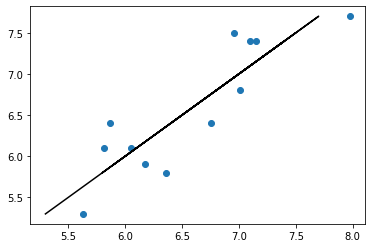

In [207]:
plt.scatter( test_set_pred, y_test)
plt.plot( y_test, y_test, c='k')

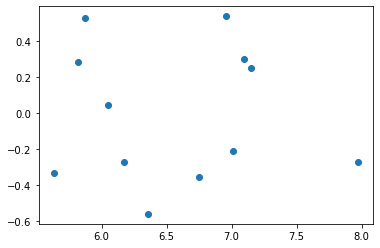

In [208]:
residual = y_test-test_set_pred
plt.scatter( test_set_pred, residual)

In [209]:
coefficients_df  = pd.DataFrame(coefficients, columns=['Feature', 'Coefficient'])

coefficients_df['abs_val_of_coefficient'] = coefficients_df.Coefficient.abs()
coefficients_df.sort_values(by='abs_val_of_coefficient', ascending=False, inplace=True)

coefficients_df.drop(columns='abs_val_of_coefficient', inplace=True)
coefficients_df.head(20)

,Feature,Coefficient
180,log_rating_count^2,0.76071
491,cinematographer_OTHER tv_series,0.26691
127,rating_count tv_series,0.17163
28,Edward Chapman,-0.11068
194,log_rating_count tv_series,0.10506
116,rating_count cinematographer_Gaetano di Ventim...,0.01754
204,log_rating_count Basil Radford,0.01456
118,rating_count cinematographer_Glen MacWilliams,0.01329
12,cinematographer_Jack E. Cox,-0.00817
35,Isabel Jeans,-0.00670


In [210]:
Lasso_CV_model_w_rc = {"r2_score": r2_score, 'mean absolute error': mean_absolute_error, 'coefficients': coefficients_df}
Lasso_CV_model_w_rc 

{'r2_score': <function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>,
 'mean absolute error': 0.32967179956173265,
 'coefficients':                                                Feature  Coefficient
 180                                 log_rating_count^2      0.76071
 491                    cinematographer_OTHER tv_series      0.26691
 127                             rating_count tv_series      0.17163
 28                                      Edward Chapman     -0.11068
 194                         log_rating_count tv_series      0.10506
 ..                                                 ...          ...
 268  cinematographer_Claude L. McDonnell George Curzon      0.00000
 269   cinematographer_Claude L. McDonnell Leslie Banks      0.00000
 270    cinematographer_Claude L. McDonnell Grace Kelly      0.00000
 271     cinematographer_Claude L. McDonnell Ian Hunter     -0.00000
 740                                    Percy Ma

In [211]:
LCVM_w_rc_filename = 'Lasso_CV_model_w_rc_poly_' + director
with open(dir_str + LCVM_w_rc_filename, 'wb') as to_write:
    pickle.dump(Lasso_CV_model_w_rc, to_write)

### Rerun the model without using rating count

In [212]:
X_tr_no_rc = X_train_val_combo.drop(columns = ['rating_count', 'log_rating_count'])

In [213]:
X_te_no_rc = X_test_combo.drop(columns = ['rating_count', 'log_rating_count'])

In [214]:
#X_tr = pd.DataFrame(X_tr, columns=X_train.columns )
#X_tr.head()

In [215]:
#X_te = pd.DataFrame(X_te, columns=X_train.columns )

In [216]:
#X_tr_no_rc  = X_tr.drop(columns = ['rating_count', 'log_rating_count'])

In [217]:
#X_te_no_rc = X_te.drop(columns = ['rating_count', 'log_rating_count'])

In [218]:
X_tr_no_rc_columns = X_tr_no_rc.columns
poly = PolynomialFeatures(degree=2)

X_tr_no_rc_poly =  poly.fit_transform(X_tr_no_rc )
X_te_no_rc_poly = poly.transform(X_te_no_rc)

X_tr_no_rc_poly_columns = poly.get_feature_names(X_tr_no_rc_columns)

In [219]:
## Scale the data as before
std = StandardScaler()
std.fit(X_tr_no_rc_poly)
## Scale the Predictors on both the train and test set
X_tr_no_rc_poly_st = std.transform(X_tr_no_rc_poly)
X_te_no_rc_poly_st = std.transform(X_te_no_rc_poly)

In [220]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,1000)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr_no_rc_poly_st, y_train_val)

# This is the best alpha value it found 
lasso_model.alpha_

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033522619045824875, tolerance: 0.003318923076923078
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033439046851282406, tolerance: 0.003318923076923078
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003335402261286813, tolerance: 0.003318923076923078
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sk

0.26146732118010924

In [221]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
coefficients = list(zip(X_tr_no_rc_poly_columns, lasso_model.coef_))
coefficients_df = pd.DataFrame(coefficients, columns=['Feature', 'Coefficient']).sort_values(by='Coefficient', ascending=False)



In [222]:
len(coefficients_df)
#lasso_model.coef_

666

In [223]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te_no_rc_poly_st)

In [224]:
# Find the MAE and R^2 on the test set using this model
mean_absolute_error = mae(y_test, test_set_pred)
mean_absolute_error

0.6181757061564749

In [225]:
r2_score_ = r2_score(y_test, test_set_pred)
r2_score_ 


0.10358929288549634

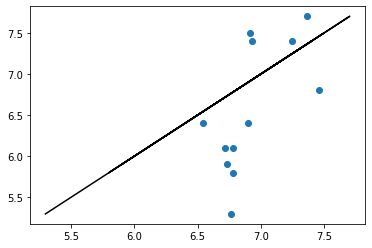

In [226]:
plt.scatter( test_set_pred, y_test)
plt.plot( y_test, y_test, c='k')
#plt.plot( x_te_no_rc, y_test, c='k')

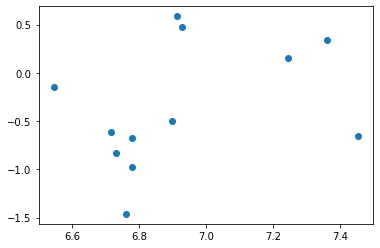

In [227]:
residual = y_test-test_set_pred
plt.scatter( test_set_pred, residual)



In [228]:
coefficients_df.head(30)

,Feature,Coefficient
3,log_year,0.18893
84,duration cinematographer_Robert Burks,0.03900
446,cinematographer_Robert Burks Edward Chapman,0.00000
438,cinematographer_Robert Burks Leo G. Carroll,0.00000
439,cinematographer_Robert Burks John Longden,0.00000
440,cinematographer_Robert Burks Edmund Gwenn,-0.00000
441,cinematographer_Robert Burks Gordon Harker,0.00000
442,cinematographer_Robert Burks James Stewart,0.00000
443,cinematographer_Robert Burks Hannah Jones,0.00000
444,cinematographer_Robert Burks Donald Calthrop,0.00000


In [229]:
Lasso_CV_model_no_rc = {"r2_score": r2_score, 'mean absolute error': mean_absolute_error, 'coefficients': coefficients_df}
Lasso_CV_model_no_rc 


{'r2_score': <function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>,
 'mean absolute error': 0.6181757061564749,
 'coefficients':                                          Feature  Coefficient
 3                                       log_year      0.18893
 84         duration cinematographer_Robert Burks      0.03900
 446  cinematographer_Robert Burks Edward Chapman      0.00000
 438  cinematographer_Robert Burks Leo G. Carroll      0.00000
 439    cinematographer_Robert Burks John Longden      0.00000
 ..                                           ...          ...
 611                             Edward Chapman^2     -0.00000
 128                      log_year Edward Chapman     -0.00057
 331   cinematographer_Jack E. Cox Edward Chapman     -0.00070
 95                       duration Edward Chapman     -0.00154
 26                                Edward Chapman     -0.04039
 
 [666 rows x 2 columns]}

In [230]:
LCVM_no_rc_filename = 'Lasso_CV_model_no_rc_poly_' + director
with open(dir_str + LCVM_no_rc_filename, 'wb') as to_write:
    pickle.dump(Lasso_CV_model_no_rc, to_write)

In [231]:
from sklearn.linear_model import lars_path
print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(np.array(X_tr_no_rc), y_train_val.values, method='lasso')

Computing regularization path using the LARS ...


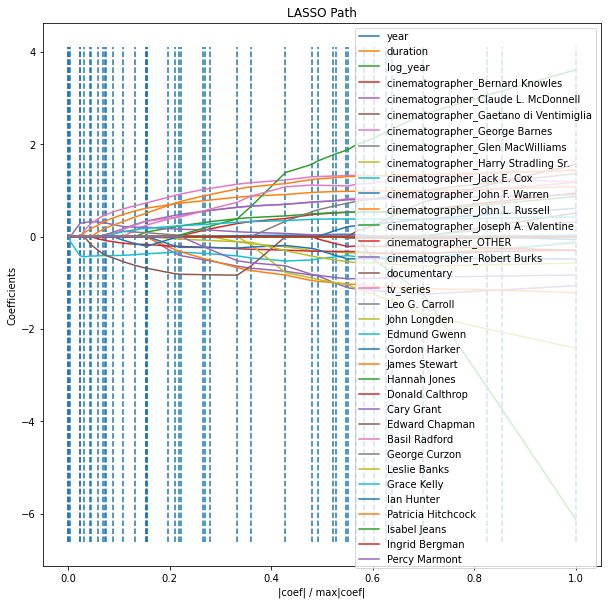

In [232]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_tr_no_rc.columns)
plt.show()

### Ridge regression

In [233]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_tr_no_rc_poly_st, y_train_val)

# This is the best alpha value it found 
ridge_model.alpha_

100.0

In [234]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
coefficients = list(zip(X_tr_no_rc_poly_columns, ridge_model.coef_))

coefficients_df  = pd.DataFrame(coefficients, columns=['Feature', 'Coefficient'])

coefficients_df['abs_val_of_coefficient'] = coefficients_df.Coefficient.abs()
coefficients_df.sort_values(by='abs_val_of_coefficient', ascending=False, inplace=True)

coefficients_df.drop(columns='abs_val_of_coefficient', inplace=True)
coefficients_df

,Feature,Coefficient
371,cinematographer_John L. Russell tv_series,-0.07129
416,cinematographer_OTHER tv_series,0.05903
386,cinematographer_John L. Russell Patricia Hitch...,0.05230
347,cinematographer_John F. Warren tv_series,0.04880
421,cinematographer_OTHER James Stewart,0.04042
...,...,...
309,cinematographer_Harry Stradling Sr. Grace Kelly,0.00000
308,cinematographer_Harry Stradling Sr. Leslie Banks,0.00000
307,cinematographer_Harry Stradling Sr. George Curzon,0.00000
306,cinematographer_Harry Stradling Sr. Basil Radford,0.00000


In [235]:
# Make predictions on the test set using the new model
test_set_pred = ridge_model.predict(X_te_no_rc_poly_st)

In [236]:
# Find the MAE and R^2 on the test set using this model
mean_absolute_error = mae(y_test, test_set_pred)
mean_absolute_error

0.490409299418787

In [237]:
r2_score_ = r2_score(y_test, test_set_pred)
r2_score_ 


0.3285421340879219

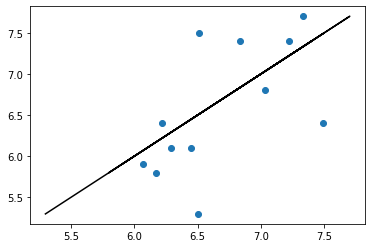

In [238]:
plt.scatter( test_set_pred, y_test)
plt.plot( y_test, y_test, c='k')

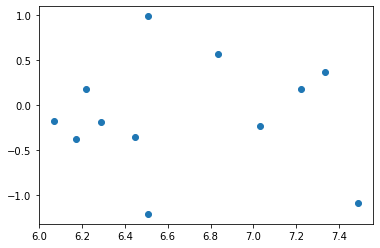

In [239]:
residual = y_test-test_set_pred
plt.scatter( test_set_pred, residual)


In [240]:
coefficients_df.head()

,Feature,Coefficient
371,cinematographer_John L. Russell tv_series,-0.07129
416,cinematographer_OTHER tv_series,0.05903
386,cinematographer_John L. Russell Patricia Hitch...,0.05230
347,cinematographer_John F. Warren tv_series,0.04880
421,cinematographer_OTHER James Stewart,0.04042


In [241]:
Ridge_CV_model_no_rc = {"r2_score": r2_score, 'mean absolute error': mean_absolute_error, 'coefficients': coefficients_df}
Ridge_CV_model_no_rc 


{'r2_score': <function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>,
 'mean absolute error': 0.490409299418787,
 'coefficients':                                                Feature  Coefficient
 371          cinematographer_John L. Russell tv_series     -0.07129
 416                    cinematographer_OTHER tv_series      0.05903
 386  cinematographer_John L. Russell Patricia Hitch...      0.05230
 347           cinematographer_John F. Warren tv_series      0.04880
 421                cinematographer_OTHER James Stewart      0.04042
 ..                                                 ...          ...
 309    cinematographer_Harry Stradling Sr. Grace Kelly      0.00000
 308   cinematographer_Harry Stradling Sr. Leslie Banks      0.00000
 307  cinematographer_Harry Stradling Sr. George Curzon      0.00000
 306  cinematographer_Harry Stradling Sr. Basil Radford      0.00000
 333          cinematographer_Jack E. Cox George C

In [242]:
RCVM_no_rc_filename = 'Ridge_CV_model_no_rc_poly_' + director
with open(dir_str + RCVM_no_rc_filename, 'wb') as to_write:
    pickle.dump(Ridge_CV_model_no_rc, to_write)

## Including `budget` as a feature 
This entails a fewer rows of data, since many of the films don't have budget info available on IMDB

In [243]:
films_to_analyze_financial_df = films_to_analyze[(films_to_analyze['budget'] > 0) & (films_to_analyze['worldwide_gross'] > 0)]

In [244]:
analysis_columns = ['title', 'year', 'duration', 'budget', 'cinematographer', 'documentary', 'tv_series','rating', *prevalent_actor_columns]

In [245]:
analysis_columns 

['title',
 'year',
 'duration',
 'budget',
 'cinematographer',
 'documentary',
 'tv_series',
 'rating',
 'Leo G. Carroll',
 'John Longden',
 'Edmund Gwenn',
 'Gordon Harker',
 'James Stewart',
 'Hannah Jones',
 'Donald Calthrop',
 'Cary Grant',
 'Edward Chapman',
 'Basil Radford',
 'George Curzon',
 'Leslie Banks',
 'Grace Kelly',
 'Ian Hunter',
 'Patricia Hitchcock',
 'Isabel Jeans',
 'Ingrid Bergman',
 'Percy Marmont']

In [246]:
films_and_features_to_analyze_df = films_to_analyze_financial_df[analysis_columns]

In [247]:
cinematographer_include_threshold = films_and_features_to_analyze_df['cinematographer'].value_counts().min()
cinematographer_include_threshold

1

In [248]:
value_counts = films_and_features_to_analyze_df['cinematographer'].value_counts() # Specific column 
to_remove = value_counts[value_counts <= cinematographer_include_threshold].index
films_and_features_to_analyze_df['cinematographer'].replace(to_remove, 'OTHER', inplace=True)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


### Regression analysis on `rating`,  `duration`, `year` and `budget` etc

In [249]:
films_and_features_to_analyze_df.columns

Index(['title', 'year', 'duration', 'budget', 'cinematographer', 'documentary',
       'tv_series', 'rating', 'Leo G. Carroll', 'John Longden', 'Edmund Gwenn',
       'Gordon Harker', 'James Stewart', 'Hannah Jones', 'Donald Calthrop',
       'Cary Grant', 'Edward Chapman', 'Basil Radford', 'George Curzon',
       'Leslie Banks', 'Grace Kelly', 'Ian Hunter', 'Patricia Hitchcock',
       'Isabel Jeans', 'Ingrid Bergman', 'Percy Marmont'],
      dtype='object')

In [250]:
selected_cols = [*films_and_features_to_analyze_df.columns[1:7], *films_and_features_to_analyze_df.columns[8:]]

In [251]:
X= films_and_features_to_analyze_df[selected_cols]
y= films_and_features_to_analyze_df['rating']

In [252]:
X

,year,duration,budget,cinematographer,documentary,tv_series,Leo G. Carroll,John Longden,Edmund Gwenn,Gordon Harker,...,Edward Chapman,Basil Radford,George Curzon,Leslie Banks,Grace Kelly,Ian Hunter,Patricia Hitchcock,Isabel Jeans,Ingrid Bergman,Percy Marmont
2,"1,976.00000",120.00000,"4,490,375.00000",OTHER,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,"1,972.00000",116.00000,"2,000,000.00000",OTHER,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,"1,969.00000",143.00000,"4,000,000.00000",OTHER,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5,"1,966.00000",128.00000,"6,000,000.00000",OTHER,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
6,"1,964.00000",130.00000,"3,000,000.00000",Robert Burks,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
7,"1,963.00000",119.00000,"2,500,000.00000",Robert Burks,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
10,"1,960.00000",109.00000,"806,947.00000",OTHER,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
12,"1,959.00000",136.00000,"3,101,000.00000",Robert Burks,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
13,"1,958.00000",128.00000,"2,479,000.00000",Robert Burks,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
15,"1,941.00000",99.00000,"1,103,000.00000",OTHER,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000


In [253]:
y.isnull().values.any()

False

In [254]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [255]:
# X_train_val

## Preprocessing


### Categorical Variable Preprocessing

#### One-hot-encoding

In [256]:
cat_ohe_vars = ['cinematographer']
X_train_val_cat_ohe = X_train_val[cat_ohe_vars]
#X_train_cat_ohe 

In [257]:
ohe = OneHotEncoder(sparse=False,  handle_unknown='ignore')
ohe.fit(X_train_val_cat_ohe)
cat_ohe = ohe.transform(X_train_val_cat_ohe)

In [258]:
columns=ohe.get_feature_names(cat_ohe_vars)
columns

array(['cinematographer_George Barnes', 'cinematographer_OTHER',
       'cinematographer_Robert Burks'], dtype=object)

In [259]:
cat_ohe.shape[0]

21

In [260]:
X_train_val_cat_ohe.shape[0]

21

In [261]:
X_train_val_cat_ohe_df = pd.DataFrame(cat_ohe, columns=columns, index=X_train_val_cat_ohe.index)
X_train_val_cat_ohe_df.head()

,cinematographer_George Barnes,cinematographer_OTHER,cinematographer_Robert Burks
22,0.00000,0.00000,1.00000
24,0.00000,0.00000,1.00000
18,0.00000,1.00000,0.00000
40,1.00000,0.00000,0.00000
3,0.00000,1.00000,0.00000


In [262]:
X_test_cat_ohe = X_test[['cinematographer']]
X_test_cat_ohe
cat_ohe_test = ohe.transform(X_test_cat_ohe)

cat_ohe_columns = ohe.get_feature_names(['cinematographer'])
X_test_cat_ohe_df = pd.DataFrame(cat_ohe_test, columns=cat_ohe_columns)


### Continuous Variable Preprocessing

In [263]:
cont_column_names = ['year', 'duration', 'budget']
X_train_val_cont = X_train_val[cont_column_names ]

X_test_cont      = X_test[     cont_column_names ]


X_train_val_cont.head()

,year,duration,budget
22,"1,954.00000",105.00000,"1,400,000.00000"
24,"1,951.00000",101.00000,"1,200,000.00000"
18,"1,934.00000",75.00000,"40,000.00000"
40,"1,940.00000",130.00000,"1,288,000.00000"
3,"1,972.00000",116.00000,"2,000,000.00000"


In [264]:
X_train_val_cont['log_year']         = np.log(X_train_val_cont.year)
X_train_val_cont['log_budget']         = np.log(X_train_val_cont.budget)
#X_train_val_cont['budget_sq'] = X_train_val_cont.budget**2
#X_train_val_cont['budget_per_year'] = X_train_val_cont.budget/X_train_val_cont.year


X_test_cont['log_year']         = np.log(X_test_cont.year)
X_test_cont['log_budget']         = np.log(X_test_cont.budget)
#X_test_cont['budget_sq']  =  X_test_cont.budget**2
#X_test_cont['budget_per_year']  =   X_test_cont.budget/X_test_cont.year

<ipython-input-264-bf549d7df226>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_val_cont['log_year']         = np.log(X_train_val_cont.year)
<ipython-input-264-bf549d7df226>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_val_cont['log_budget']         = np.log(X_train_val_cont.budget)
<ipython-input-264-bf549d7df226>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [265]:
X_test_cont.shape[0]

6

#### Concatenate columns

In [266]:
cat_columns = ['documentary', 'tv_series', *prevalent_actor_columns]
X_train_val_cat_df = X_train_val[cat_columns]
#X_train_val_cat_df

X_test_cat_df = X_test[cat_columns]
#X_train_val_cat_df

In [267]:
X_test_cat_df.isnull().values.any()

False

In [268]:
X_train_val_combo= pd.concat([X_train_val_cont, X_train_val_cat_ohe_df, X_train_val_cat_df, ], axis='columns')
X_test_combo = pd.concat([X_test_cont.reset_index(drop=True), X_test_cat_ohe_df.reset_index(drop=True), X_test_cat_df.reset_index(drop=True), ], axis='columns')

In [269]:
X_test_cat_df.shape

(6, 20)

In [270]:
X_train_val_combo.isnull().values.any()

False

In [271]:
X_test_combo.isnull().values.any()

False

In [272]:
X_test_combo

,year,duration,budget,log_year,log_budget,cinematographer_George Barnes,cinematographer_OTHER,cinematographer_Robert Burks,documentary,tv_series,...,Edward Chapman,Basil Radford,George Curzon,Leslie Banks,Grace Kelly,Ian Hunter,Patricia Hitchcock,Isabel Jeans,Ingrid Bergman,Percy Marmont
0,"1,958.00000",128.00000,"2,479,000.00000",7.57968,14.72337,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,"1,955.00000",99.00000,"1,200,000.00000",7.57815,13.99783,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,"1,941.00000",99.00000,"1,103,000.00000",7.57096,13.91354,0.00000,1.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
3,"1,946.00000",102.00000,"2,000,000.00000",7.57353,14.50866,0.00000,1.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
4,"1,976.00000",120.00000,"4,490,375.00000",7.58883,15.31745,0.00000,1.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5,"1,956.00000",120.00000,"2,500,000.00000",7.57866,14.73180,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [273]:
selected_columns = X_train_val_combo.columns
X_train_val_combo.columns

Index(['year', 'duration', 'budget', 'log_year', 'log_budget',
       'cinematographer_George Barnes', 'cinematographer_OTHER',
       'cinematographer_Robert Burks', 'documentary', 'tv_series',
       'Leo G. Carroll', 'John Longden', 'Edmund Gwenn', 'Gordon Harker',
       'James Stewart', 'Hannah Jones', 'Donald Calthrop', 'Cary Grant',
       'Edward Chapman', 'Basil Radford', 'George Curzon', 'Leslie Banks',
       'Grace Kelly', 'Ian Hunter', 'Patricia Hitchcock', 'Isabel Jeans',
       'Ingrid Bergman', 'Percy Marmont'],
      dtype='object')

### Train vs. val split



In [274]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val_combo, y_train_val, test_size=.25, random_state=43) #43

### Lasso CV

In [275]:
X_train_val_combo_columns = X_train_val_combo.columns
poly = PolynomialFeatures(degree=2)

X_train_val_combo_poly =  poly.fit_transform(X_train_val_combo)
X_test_combo_poly = poly.transform(X_test_combo)

X_train_val_combo_poly_columns = poly.get_feature_names(X_train_val_combo_columns)

In [276]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train_val_combo_poly)
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train_val_combo_poly)
X_te = std.transform(X_test_combo_poly)

In [277]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,1000)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train_val)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007256395993255893, tolerance: 0.0006738823529411768
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000748057898906751, tolerance: 0.0006738823529411768
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007689920057537547, tolerance: 0.0006738823529411768
  model = cd_fast.enet_coordinate_descent(


LassoCV(alphas=array([1.00000000e-02, 1.00926219e-02, 1.01861017e-02, 1.02804473e-02,
       1.03756668e-02, 1.04717682e-02, 1.05687597e-02, 1.06666496e-02,
       1.07654461e-02, 1.08651577e-02, 1.09657929e-02, 1.10673602e-02,
       1.11698682e-02, 1.12733256e-02, 1.13777413e-02, 1.14831241e-02,
       1.15894830e-02, 1.16968270e-02, 1.18051653e-02, 1.19145070e-02,
       1.20248614e-02, 1.21362380e-0...
       8.08924349e+01, 8.16416760e+01, 8.23978568e+01, 8.31610415e+01,
       8.39312950e+01, 8.47086827e+01, 8.54932707e+01, 8.62851257e+01,
       8.70843150e+01, 8.78909065e+01, 8.87049689e+01, 8.95265713e+01,
       9.03557835e+01, 9.11926760e+01, 9.20373200e+01, 9.28897872e+01,
       9.37501502e+01, 9.46184819e+01, 9.54948564e+01, 9.63793480e+01,
       9.72720319e+01, 9.81729841e+01, 9.90822810e+01, 1.00000000e+02]),
        cv=5)

In [278]:
# This is the best alpha value it found 
lasso_model.alpha_

0.15602464143663689

In [279]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
coefficients = list(zip(X_train_val_combo_poly_columns, lasso_model.coef_))
coefficients

[('1', 0.0),
 ('year', 0.0),
 ('duration', -0.0),
 ('budget', -0.0),
 ('log_year', 0.0),
 ('log_budget', 0.0),
 ('cinematographer_George Barnes', 0.0),
 ('cinematographer_OTHER', -0.0),
 ('cinematographer_Robert Burks', 0.0),
 ('documentary', 0.0),
 ('tv_series', 0.0),
 ('Leo G. Carroll', 0.0),
 ('John Longden', 0.0),
 ('Edmund Gwenn', 0.0),
 ('Gordon Harker', 0.0),
 ('James Stewart', 0.0),
 ('Hannah Jones', 0.0),
 ('Donald Calthrop', 0.0),
 ('Cary Grant', 0.0),
 ('Edward Chapman', 0.0),
 ('Basil Radford', 0.0),
 ('George Curzon', -0.0053968019044912455),
 ('Leslie Banks', -4.229421046191075e-17),
 ('Grace Kelly', 0.0),
 ('Ian Hunter', 0.0),
 ('Patricia Hitchcock', 0.0),
 ('Isabel Jeans', 0.0),
 ('Ingrid Bergman', -0.0),
 ('Percy Marmont', 0.0),
 ('year^2', 0.0),
 ('year duration', -0.0),
 ('year budget', -0.0),
 ('year log_year', 0.0),
 ('year log_budget', 0.0),
 ('year cinematographer_George Barnes', 0.0),
 ('year cinematographer_OTHER', -0.0),
 ('year cinematographer_Robert Burks', 

In [280]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)

In [281]:
# Find the MAE and R^2 on the test set using this model
mean_absolute_error = mae(y_test, test_set_pred)
mean_absolute_error

0.38616379818980545

In [282]:
r2_score_ = r2_score(y_test, test_set_pred)
r2_score_ 

0.29054066637601317

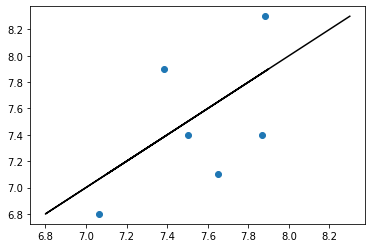

In [283]:
plt.scatter( test_set_pred, y_test)
plt.plot( y_test, y_test, c='k')

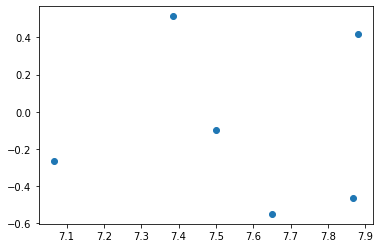

In [284]:
residual = y_test-test_set_pred
plt.scatter( test_set_pred, residual)

In [285]:
pd.options.display.float_format = "{:,.5f}".format



In [286]:
coefficients_df  = pd.DataFrame(coefficients, columns=['Feature', 'Coefficient'])
coefficients_df['abs_val_of_coefficient'] = coefficients_df.Coefficient.abs()
coefficients_df.sort_values(by='abs_val_of_coefficient', ascending=False, inplace=True)

coefficients_df.drop(columns='abs_val_of_coefficient', inplace=True)
coefficients_df.head(10)
#print(coefficients_df.head(10))

,Feature,Coefficient
88,budget cinematographer_OTHER,-0.21464
70,duration James Stewart,0.05141
102,budget George Curzon,-0.02171
21,George Curzon,-0.00540
62,duration cinematographer_OTHER,-0.00499
76,duration George Curzon,-0.00214
399,George Curzon^2,-0.00043
49,year George Curzon,-0.00039
50,year Leslie Banks,-0.00000
407,Leslie Banks^2,-0.00000


In [287]:
Lasso_CV_model_w_budget = {"r2_score": r2_score, 'mean absolute error': mean_absolute_error, 'coefficients': coefficients_df}
Lasso_CV_model_w_budget 

{'r2_score': <function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>,
 'mean absolute error': 0.38616379818980545,
 'coefficients':                             Feature  Coefficient
 88     budget cinematographer_OTHER     -0.21464
 70           duration James Stewart      0.05141
 102            budget George Curzon     -0.02171
 21                    George Curzon     -0.00540
 62   duration cinematographer_OTHER     -0.00499
 ..                              ...          ...
 149       log_budget Edward Chapman      0.00000
 148           log_budget Cary Grant      0.00000
 147      log_budget Donald Calthrop      0.00000
 146         log_budget Hannah Jones      0.00000
 434                 Percy Marmont^2      0.00000
 
 [435 rows x 2 columns]}

In [288]:
LCVM_w_budget_filename = 'Lasso_CV_model_w_budget_poly_' + director
with open(dir_str + LCVM_w_budget_filename, 'wb') as to_write:
    pickle.dump(Lasso_CV_model_w_budget, to_write)

### Ridge regression

In [289]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_tr, y_train_val)

# This is the best alpha value it found 
ridge_model.alpha_

100.0

In [290]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
coefficients = list(zip(X_train_val_combo_poly_columns, ridge_model.coef_))


In [291]:
# Make predictions on the test set using the new model
test_set_pred = ridge_model.predict(X_te)

In [292]:
# Find the MAE and R^2 on the test set using this model
mean_absolute_error = mae(y_test, test_set_pred)
mean_absolute_error

0.4288763842058601

In [293]:
r2_score_ = r2_score(y_test, test_set_pred)
r2_score_ 

0.10009862289384586

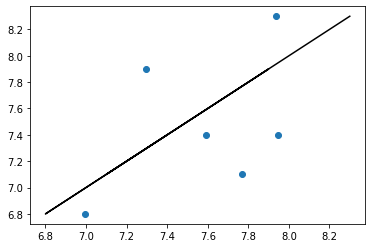

In [294]:

plt.scatter( test_set_pred, y_test)
plt.plot( y_test, y_test, c='k')

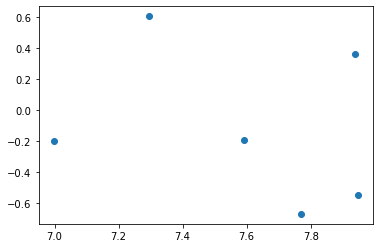

In [295]:
residual = y_test-test_set_pred
plt.scatter( test_set_pred, residual)

In [296]:
coefficients_df  = pd.DataFrame(coefficients, columns=['Feature', 'Coefficient'])
coefficients_df['abs_val_of_coefficient'] = coefficients_df.Coefficient.abs()
coefficients_df.sort_values(by='abs_val_of_coefficient', ascending=False, inplace=True)

coefficients_df.drop(columns='abs_val_of_coefficient', inplace=True)
coefficients_df.head(10)

,Feature,Coefficient
88,budget cinematographer_OTHER,-0.02482
58,duration budget,-0.02253
271,Leo G. Carroll Cary Grant,0.02219
86,budget log_budget,-0.02204
84,budget^2,-0.02174
3,budget,-0.02165
85,budget log_year,-0.02165
31,year budget,-0.02164
186,cinematographer_OTHER Leo G. Carroll,-0.01847
62,duration cinematographer_OTHER,-0.01724


In [297]:
Ridge_CV_model_w_budget = {"r2_score": r2_score, 'mean absolute error': mean_absolute_error, 'coefficients': coefficients_df}
Ridge_CV_model_w_budget 

{'r2_score': <function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>,
 'mean absolute error': 0.4288763842058601,
 'coefficients':                                         Feature  Coefficient
 88                 budget cinematographer_OTHER     -0.02482
 58                              duration budget     -0.02253
 271                   Leo G. Carroll Cary Grant      0.02219
 86                            budget log_budget     -0.02204
 84                                     budget^2     -0.02174
 ..                                          ...          ...
 210  cinematographer_Robert Burks Gordon Harker      0.00000
 209   cinematographer_Robert Burks Edmund Gwenn      0.00000
 208   cinematographer_Robert Burks John Longden      0.00000
 206      cinematographer_Robert Burks tv_series      0.00000
 434                             Percy Marmont^2      0.00000
 
 [435 rows x 2 columns]}

In [298]:
RCVM_w_budget_filename = 'Ridge_CV_model_w_budget_poly_' + director
with open(dir_str + RCVM_w_budget_filename, 'wb') as to_write:
    pickle.dump(Ridge_CV_model_w_budget, to_write)